In [43]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='Ashwini__', api_key='ipQKFM2zb12IsrIIrveI')
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [44]:
#Loading File
CitiDataFile = pd.read_csv("CitiBike Data.csv")
CitiDataFile.head(5)
CitiDataFile.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [45]:
#Summary Statistics
CitiDataFile.describe()
CitiDataFile.describe().transpose()
CitiDataFile.ndim

2

In [46]:
#Data Cleaning - Checking for missing data
CitiDataFile.isnull().any().any(), CitiDataFile.shape
CitiDataFile.isnull().sum(axis=0)

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [47]:
#Summary Statistics for tripduration in minutes

CitiDataFile['tripduration'] = CitiDataFile['tripduration'].apply(lambda x: x/60)
CitiDataFile['tripduration']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
7          1.0
8          1.0
9          1.0
10         1.0
11         1.0
12         1.0
13         1.0
14         1.1
15         1.1
16         1.1
17         1.1
18         1.1
19         1.1
20         1.1
21         1.1
22         1.1
23         1.1
24         1.1
25         1.1
26         1.1
27         1.1
28         1.1
29         1.1
         ...  
20823    123.9
20824    127.9
20825    128.0
20826    130.2
20827    136.7
20828    140.3
20829    145.4
20830    148.4
20831    151.8
20832    159.7
20833    163.5
20834    165.7
20835    177.5
20836    178.7
20837    187.0
20838    187.5
20839    189.6
20840    203.5
20841    204.5
20842    226.2
20843    293.7
20844    298.6
20845    345.5
20846    360.9
20847    392.7
20848    420.1
20849    423.3
20850    534.2
20851    539.9
20852    560.1
Name: tripduration, Length: 20853, dtype: float64

In [48]:
#Correlation between age and tripduration

CitiDataFile['Age'] = 2018 - CitiDataFile['birth year']
CitiDataFile['Age'] = CitiDataFile['Age'].astype(int)
CitiDataFile['Age'].corr(CitiDataFile['tripduration'])
CitiDataFile['Age']

0        33
1        35
2        61
3        46
4        33
5        30
6        39
7        52
8        29
9        29
10       30
11       54
12       55
13       40
14       38
15       40
16       44
17       45
18       54
19       40
20       59
21       39
22       43
23       77
24       42
25       35
26       54
27       70
28       61
29       28
         ..
20823    50
20824    55
20825    28
20826    39
20827    45
20828    40
20829    65
20830    40
20831    36
20832    39
20833    59
20834    31
20835    30
20836    60
20837    37
20838    43
20839    31
20840    39
20841    45
20842    35
20843    34
20844    52
20845    34
20846    36
20847    31
20848    41
20849    39
20850    42
20851    30
20852    39
Name: Age, Length: 20853, dtype: int32

In [49]:
#subsetting data
femaletrip = CitiDataFile['gender'] == 2
CitiDataFile[femaletrip].head()
FemaleTripData = CitiDataFile[femaletrip]
FemaleTripData.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age
0,1.0,7/3/13 18:13,7/3/13 18:14,434,9 Ave & W 18 St,40.743174,-74.003664,434,9 Ave & W 18 St,40.743174,-74.003664,18197,Subscriber,1985,2,33
2,1.0,7/24/13 22:02,7/24/13 22:03,468,Broadway & W 55 St,40.765265,-73.981923,468,Broadway & W 55 St,40.765265,-73.981923,16780,Subscriber,1957,2,61
7,1.0,7/6/13 20:59,7/6/13 21:00,476,E 31 St & 3 Ave,40.743943,-73.979661,476,E 31 St & 3 Ave,40.743943,-73.979661,15579,Subscriber,1966,2,52
9,1.0,7/22/13 17:23,7/22/13 17:24,356,Bialystoker Pl & Delancey St,40.716226,-73.982612,356,Bialystoker Pl & Delancey St,40.716226,-73.982612,15585,Subscriber,1989,2,29
10,1.0,7/26/13 20:59,7/26/13 21:00,438,St Marks Pl & 1 Ave,40.727791,-73.985649,438,St Marks Pl & 1 Ave,40.727791,-73.985649,20232,Subscriber,1988,2,30


1

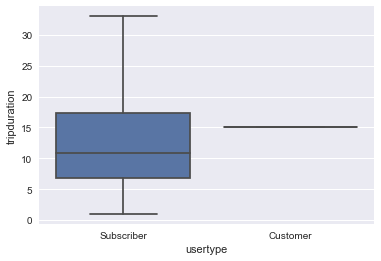

In [50]:
#anamolies in the data set
sns.boxplot(x="usertype",y="tripduration",data=CitiDataFile, showfliers=False)
Customertype =CitiDataFile['usertype']=="Customer"
CitiDataFile[Customertype].usertype.count()
#just one record with the usertype customer - which is insufficent for any data analysis 

In [51]:
#Droping the anamolies
d1 = CitiDataFile[CitiDataFile.gender !=0 ]
df = d1[d1.usertype!='customer']

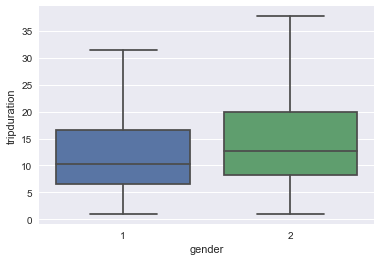

In [52]:
#Box Plot for tripduration by gender

sns.set(style="darkgrid")
sns.boxplot(y="tripduration",x="gender",data=df,showfliers=False)

In [53]:
#The total revenue - all users riding bikes from 0 to 45 minutes pay $3 per ride and user exceeding 45 minutes pay an additional $2 per ride.
durationabove45 = df['tripduration'] > 45
durationbelow45 = df['tripduration'] <= 45
revenue= sum(df[durationbelow45].tripduration)*3+ sum(df[durationabove45].tripduration)*2
revenue


838788.3999999987

In [54]:
#Looking at tripduration in minutes, what can we say about the variance in the data.
df['tripduration'].std()
df['tripduration'].var()
durationabove45 = df['tripduration'] > 45

print(df[durationabove45].tripduration.count())#216 records above 45 minutes of trip duration.

PercentageOfrecords = (df[durationabove45].tripduration.count()/df['tripduration'].count())*100
PercentageOfrecords #just 1% of Data have tripduration above 45mins 

216


1.0359712230215827

In [55]:
#Pricing Strategy - 
#The pricing strategy is targeting the duration of trips above 45mins per ride. With just 1% of data accounting to trips above 45mins, clearly the strategy is less effective.


In [63]:
#Highly popular trip from the data

PopularTrip = df.groupby(['start station name','end station name']).size().reset_index(name = 'Total Trips')
PopularTrip
PopularTrip['station details'] = PopularTrip['start station name'].map(str) + " to " + df['end station name']
PopularTrip
barp = [go.Bar(x=PopularTrip['Total Trips'], y=PopularTrip['station details'])]
url = py.plot(barp, filename='Popular Trips-chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Ashwini__/0 or inside your plot.ly account where it is named 'Popular Trips-chart'
